## Pre-processing and Visualization

In [1]:
# Import the required libraries.
import re
import math
import random
import collections
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
df_list = []

# Function for loading the data into a pandas dataframe.
with open('./preprocessed_BCLL.txt') as f:
    for line in f:
        line = line.strip()
        columns = re.split('\s+', line, maxsplit = 23)

        for i, column in enumerate(columns):
            if i >= 2:
                try:
                    columns[i] = float(column)
                except:
                    columns[1] = columns[1] + ' ' + columns[2]
                    del(columns[2])

                    for j, new_column in enumerate(columns):
                        if j >= 2:
                            columns[j] = float(new_column)

        df_list.append(columns)

data = pd.DataFrame(df_list)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1009_at,HINT1,1145.5,1014.9,1103.1,850.4,886.6,859.3,1228.6,1231.9,...,763.7,1382.4,1008.2,1025.9,1197.0,735.2,865.3,485.0,811.1,783.0
1,100_g_at,RABGGTA,169.0,200.6,196.3,151.4,167.8,111.3,164.9,240.6,...,277.2,172.7,163.6,194.0,117.1,130.5,164.2,212.2,108.4,114.7
2,1011_s_at,YWHAE,25.9,31.7,43.3,40.9,40.8,26.7,45.1,62.0,...,12.5,53.6,72.8,59.6,33.3,35.8,45.3,68.0,56.7,39.3
3,1012_at,KAT2B,28.0,34.4,13.2,28.3,15.7,56.5,35.2,25.0,...,20.4,11.6,15.9,5.9,18.2,28.8,55.0,35.9,25.2,18.8
4,1013_at,SMAD5,17.2,3.0,6.0,9.9,10.0,16.7,1.5,10.0,...,1.4,6.5,12.3,11.3,9.2,2.1,4.7,1.3,5.4,3.8
5,1018_at,WNT10B,20.4,50.2,47.4,33.0,39.7,20.4,27.2,27.2,...,90.6,36.1,35.4,17.7,27.9,83.9,24.3,29.4,42.7,37.5
6,1019_g_at,WNT10B,104.6,40.2,63.3,69.6,81.8,54.6,53.4,38.5,...,156.4,59.8,48.9,70.3,65.5,127.4,52.5,147.2,105.0,84.8
7,1020_s_at,CIB1,510.1,490.4,528.6,645.6,728.9,446.9,500.7,562.4,...,352.8,423.8,707.6,521.2,597.9,556.3,654.4,368.4,523.4,362.7
8,1025_g_at,CYP1A1,31.7,23.9,25.5,19.9,39.4,21.6,17.9,19.5,...,56.0,18.8,27.0,15.5,19.2,44.6,35.9,54.8,22.9,27.0
9,1029_s_at,TXK,16.9,7.6,18.4,14.3,18.6,14.1,13.3,14.6,...,14.8,13.6,5.3,9.8,3.8,26.6,8.3,2.3,19.5,1.8


### Part A

In [4]:
# Get all the numeric data from the original dataframe.
X = data._get_numeric_data().reset_index(drop = True)
# Normalize the dataframe.
X = X.apply(lambda column: (column - column.mean()) / column.std(), axis = 0)

Iteration:  1  Number of Clusters:  25  Silhouette Score:  0.5116888578964914
Iteration:  2  Number of Clusters:  9  Silhouette Score:  0.6883681426613889
Iteration:  3  Number of Clusters:  5  Silhouette Score:  0.7919273249611707
Iteration:  4  Number of Clusters:  29  Silhouette Score:  0.5156469910906026
Iteration:  5  Number of Clusters:  57  Silhouette Score:  0.35212106234198476
Iteration:  6  Number of Clusters:  48  Silhouette Score:  0.41426914025920936
Iteration:  7  Number of Clusters:  45  Silhouette Score:  0.4289027196835359
Iteration:  8  Number of Clusters:  54  Silhouette Score:  0.37906474937365137
Iteration:  9  Number of Clusters:  14  Silhouette Score:  0.5830030914657455
Iteration:  10  Number of Clusters:  33  Silhouette Score:  0.48617397028658754


Text(0, 0.5, 'Silhouette Score')

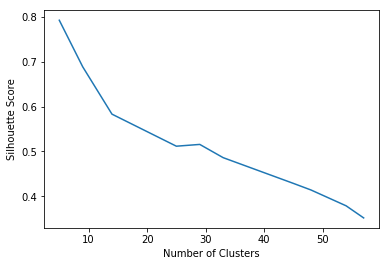

In [5]:
SSE = {}
max_silhouette_score = -2
max_silhouette_score_cluster = 0

# Run the loop 10 times.
for k in range(1, 11):
    clusters = random.randint(2, int(math.sqrt(X.shape[0])))

    # Check for the previously seen values.
    if clusters in SSE.keys():
        clusters = random.randint(2, int(math.sqrt(X.shape[0])))

    # Get the labels for each sample.
    labels = KMeans(n_clusters = clusters, random_state = 42).fit_predict(X)
    # Get the silhouette score for each sample.
    score = silhouette_score(X, labels, metric = 'euclidean', sample_size = None, random_state = 42)

    # Update the maximum score seen, and the cluster number which gives that score.
    if score > max_silhouette_score:
        max_silhouette_score = score
        max_silhouette_score_cluster = clusters

    # Store the number of clusters which give a particular score.
    SSE[clusters] = score
    print('Iteration: ', k, ' Number of Clusters: ', clusters, ' Silhouette Score: ', score)

# Order the cluster numbers.
sorted_SSE = sorted(SSE.items(), key = lambda kv: kv[0])
sorted_SSE = collections.OrderedDict(sorted_SSE)
# Plot the graph for silhouette score vs number of clusters.
plt.plot(list(sorted_SSE.keys()), list(sorted_SSE.values()))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

### Part B

In [6]:
print('Maximum Silhouette Score: ', max_silhouette_score)
print('Number of Clusters: ', max_silhouette_score_cluster)

# Get the labels for each sample for the case where we see the maximum silhouette score.
labels = KMeans(n_clusters = max_silhouette_score_cluster, random_state = 42).fit_predict(X)   

Maximum Silhouette Score:  0.7919273249611707
Number of Clusters:  5


In [7]:
# Append the labels to the respective sample.
data['23'] = labels

# Output the clusters to individual files.
for label in set(labels.tolist()):
    cluster_data = data.loc[data['23'] == label, data.columns != '23'] 
    cluster_data.to_csv('Cluster_' + str(label + 1) + '.csv', header = False, index = False)